

---

## 📊 Задачи для Data Analyst на основе твоего `sales_dataset.csv`

---


Задачи на уверенное владение Pandas, базовый анализ и визуализацию.

1. 📌 **Посчитать общее количество проданных единиц продукции за весь период.**
2. 📌 **Определить 5 самых продаваемых продуктов за весь период.**
3. 📌 **Посчитать среднее количество продаж в день.**
4. 📌 **Определить количество возвратов по каждой компании.**
5. 📌 **Построить линейный график продаж по дням.**
6. 📌 **Построить гистограмму количества продаж по дням недели.**
7. 📌 **Посчитать выручку по каждой компании за весь период.**


---

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('sales_dataset.csv')
df['Дата'] = pd.to_datetime(df['Дата'])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11658 entries, 0 to 11657
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Дата        11658 non-null  datetime64[ns]
 1   Компания    11658 non-null  object        
 2   Продукт     11658 non-null  object        
 3   Цена (сум)  11658 non-null  int64         
 4   Количество  11658 non-null  int64         
 5   Возврат     11658 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 546.6+ KB


In [4]:
df.head()

,Дата,Компания,Продукт,Цена (сум),Количество,Возврат
0,2024-07-12,Mezon,"Сметана 400 гр, 20%",9790,1,0
1,2024-07-12,Best,"Каймак 400 гр, 50%",12990,1,0
2,2024-07-12,Mezon,"Кефир 0.5 л, 2.5%",5990,1,0
3,2024-07-12,Mezon,"Сметана 200 гр, 20%",5490,1,0
4,2024-07-12,Mezon,"Сметана 400 гр, 20%",9790,1,0


In [5]:
df['Количество'].sum()

11658

In [6]:
top_products = df.groupby('Продукт')['Количество'].sum().sort_values(ascending=False).head()
top_products

Продукт
Сметана 400 гр, 20%    1355
Сметана 200 гр, 20%    1064
Каймак 200 гр, 45%      699
Каймак 400 гр, 45%      687
Сметана 400 гр, 15%     674
Name: Количество, dtype: int64

In [7]:
avg_sales = df.groupby('Дата')['Количество'].sum().mean()
avg_sales

191.11475409836066

In [8]:
company_return = df.groupby('Компания')['Возврат'].sum().sort_values(ascending=False)
company_return

Компания
Best          28
Pure Milky    25
Mezon         24
Kamilka       22
Dobroe        12
Rash Milk      5
Name: Возврат, dtype: int64

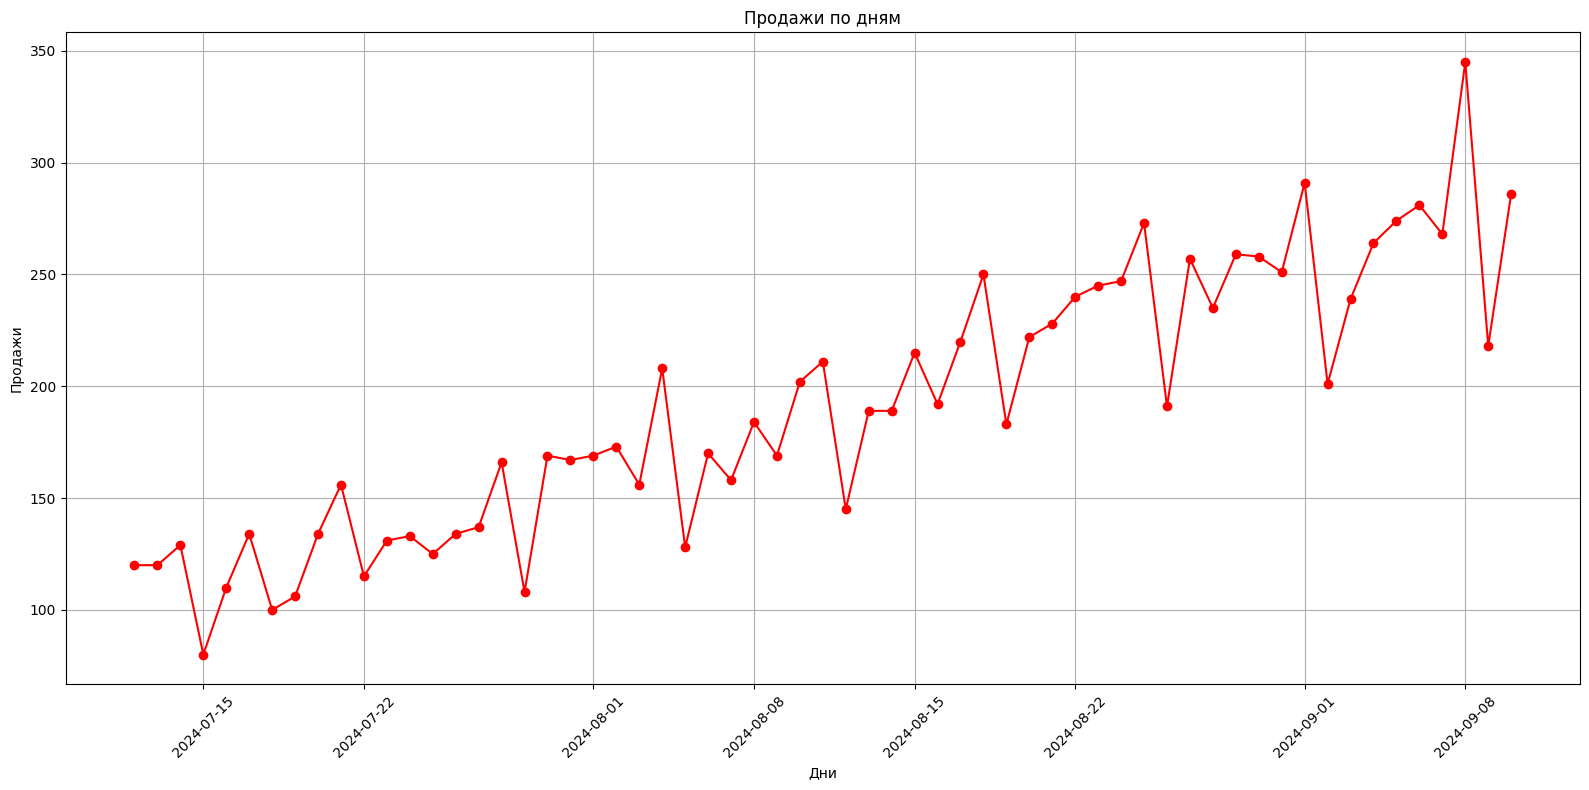

In [9]:
sales_a_day = df.groupby('Дата')['Количество'].sum()

plt.figure(figsize=(16, 8))
plt.plot(sales_a_day.index, sales_a_day.values, marker='o', color='red')
plt.title('Продажи по дням')
plt.xlabel('Дни')
plt.ylabel('Продажи')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

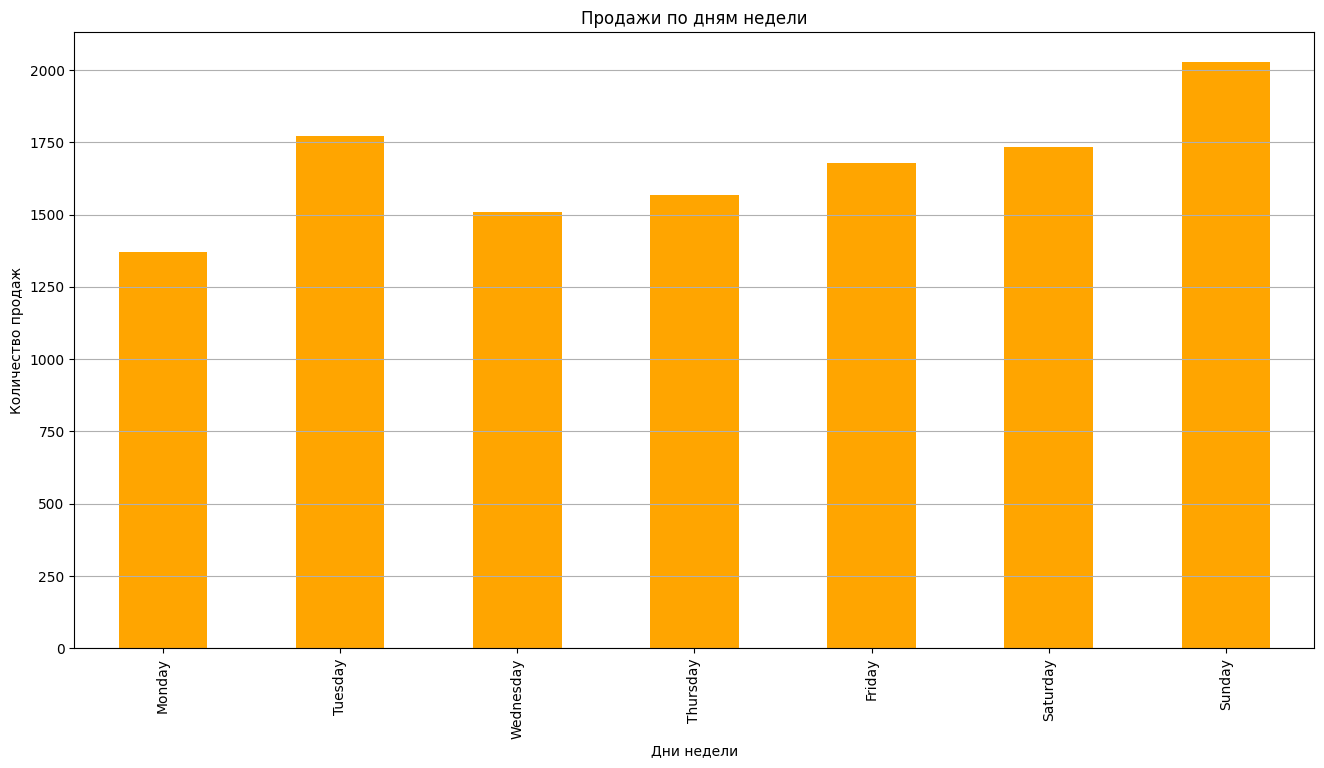

In [10]:
df['Weekday'] = df['Дата'].dt.day_name()
weekday_sales = df.groupby('Weekday')['Количество'].sum()

import calendar
ordered_days = list(calendar.day_name)
week_sales = weekday_sales.reindex(ordered_days)

plt.figure(figsize=(16, 8))
week_sales.plot(kind='bar', color='orange')
plt.title('Продажи по дням недели')
plt.xlabel('Дни недели')
plt.ylabel('Количество продаж')
plt.grid(axis='y')
plt.show()

In [11]:
revenue = df.groupby('Компания')['Цена (сум)'].sum().sort_values(ascending=False)
revenue

Компания
Pure Milky    40771750
Kamilka       38565650
Dobroe        28252600
Best          23277040
Mezon         17728120
Rash Milk     12227950
Name: Цена (сум), dtype: int64

---

Задачи на групповую агрегацию, работу с трендами, сезонностью, визуализации.

1. 📌 **Определить динамику средней выручки в неделю и в месяц.**
2. 📌 **Построить график тренда общего объёма продаж по дням (скользящее среднее 7 дней).**
3. 📌 **Посмотреть, какие продукты чаще всего возвращали.**
4. 📌 **Построить сравнительный график среднедневных продаж по компаниям.**
5. 📌 **Посчитать долю каждой компании в общем объёме продаж.**
6. 📌 **Посмотреть среднюю цену по категориям продукта (например: каймак, сметана, кефир).**
7. 📌 **Построить тепловую карту продаж по дням недели и по компаниям.**
8. 📌 **Проанализировать, какие дни недели приносят наибольшую выручку.**

---

In [12]:
# 1

mean_revenue = df.groupby('Дата')['Цена (сум)'].sum().mean()
print(mean_revenue)

df['month'] = df['Дата'].dt.to_period('M')
month_revenue = df.groupby('month')['Цена (сум)'].sum().mean()
print(month_revenue)

2636444.426229508
53607703.333333336


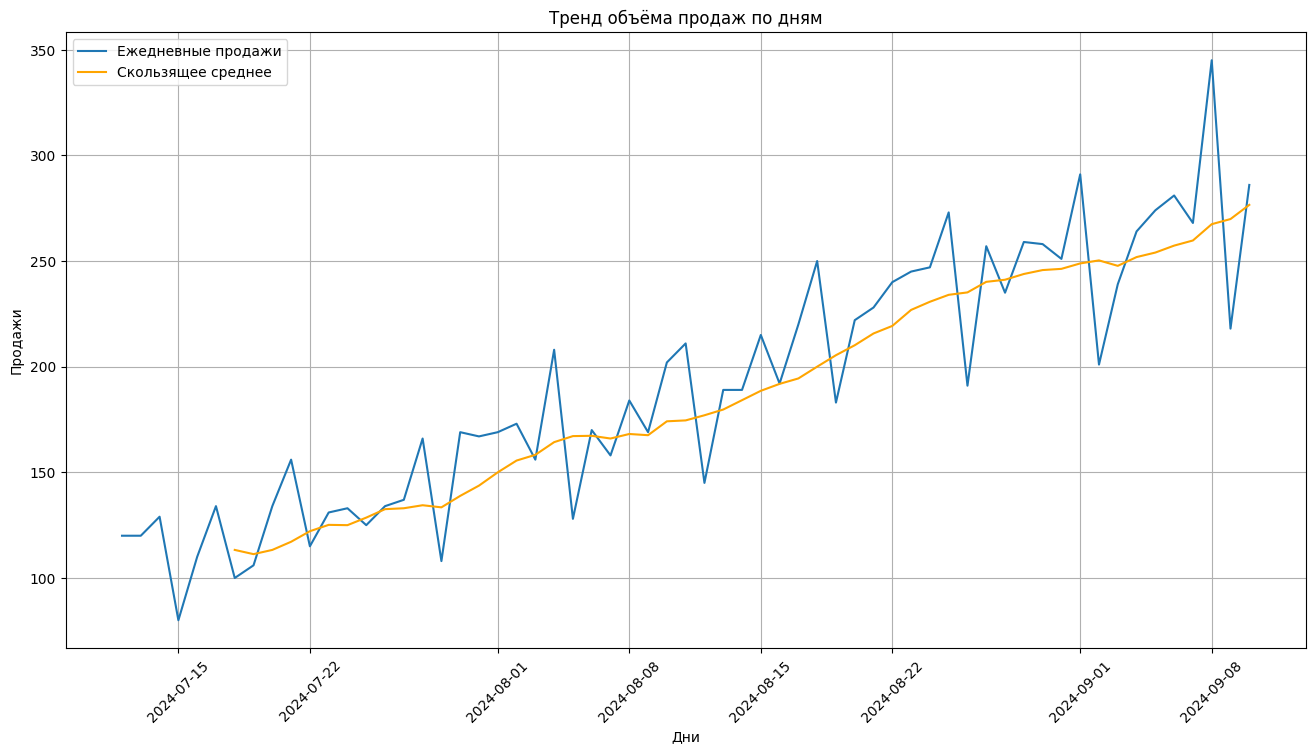

In [13]:
# 2

daily_sales = df.groupby('Дата')['Количество'].sum()
rolling_sales = daily_sales.rolling(window=7).mean()

plt.figure(figsize=(16, 8))
plt.plot(daily_sales, label='Ежедневные продажи')
plt.plot(rolling_sales, label='Скользящее среднее', color='orange')
plt.title('Тренд объёма продаж по дням')
plt.xlabel('Дни')
plt.ylabel('Продажи')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

In [14]:
# 3

product_return_company = df.groupby(['Продукт', 'Компания'], as_index=False)['Возврат'].sum()
product_return_company = product_return_company.sort_values('Возврат', ascending=False).reset_index(drop=True)
product_return_company

,Продукт,Компания,Возврат
0,"Каймак 180 гр, 45%",Pure Milky,8
1,"Сметана 400 гр, 20%",Mezon,7
2,"Каймак 400 гр, 45%",Kamilka,6
3,"Каймак 400 гр, 50%",Best,6
4,"Кефир 0.5 л, 2.5%",Mezon,6
5,Творожная паста 200 гр,Best,5
6,"Катык 1750 гр, 3.5%",Dobroe,5
7,"Сметана 200 гр, 20%",Best,5
8,"Кефир 920 мл, 3.2%",Pure Milky,4
9,"Каймак 350 гр, 45%",Pure Milky,4


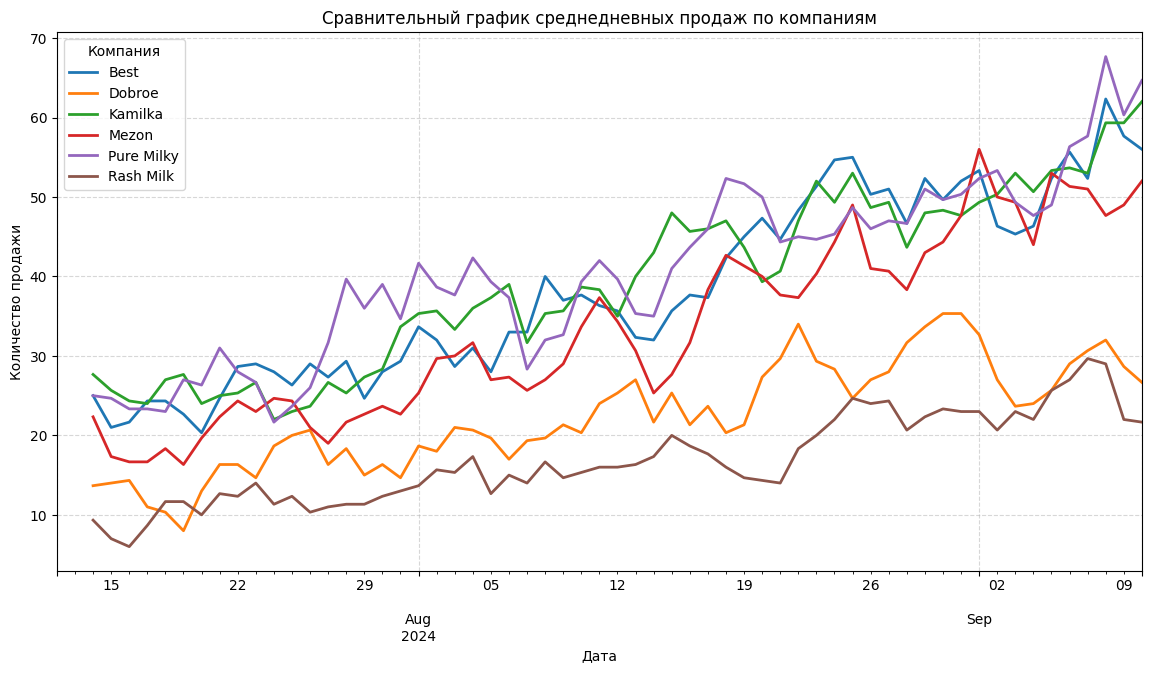

In [15]:
# 4

product_sale = df.groupby(['Дата', 'Компания'])['Количество'].sum().reset_index()

pivot_table = product_sale.pivot_table(index='Дата', columns='Компания', values='Количество')

pivot_table.rolling(window=3).mean().plot(figsize=(14, 7), linewidth=2)
plt.title('Сравнительный график среднедневных продаж по компаниям')
plt.xlabel('Дата')
plt.ylabel('Количество продажи')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Компания')
plt.show()

In [16]:
# 5

shape_of_each_company = df.groupby('Компания')['Количество'].sum()
shape_of_each_company = (shape_of_each_company / shape_of_each_company.sum()) * 100
shape_of_each_company = shape_of_each_company.sort_values(ascending=False)
shape_of_each_company

Компания
Pure Milky    21.230057
Kamilka       20.629611
Best          20.029165
Mezon         17.653114
Dobroe        11.665809
Rash Milk      8.792246
Name: Количество, dtype: float64

In [17]:
# 6
df['Category'] = df['Продукт'].str.split().str[0]

avg_price_products = df.groupby('Category')['Цена (сум)'].mean()
avg_price_products = avg_price_products.sort_values(ascending=False)
avg_price_products

Category
Катык        17765.975976
Каймак       17089.874016
Сметана      12791.358234
Кефир        11675.634603
Творожная    10050.000000
Name: Цена (сум), dtype: float64

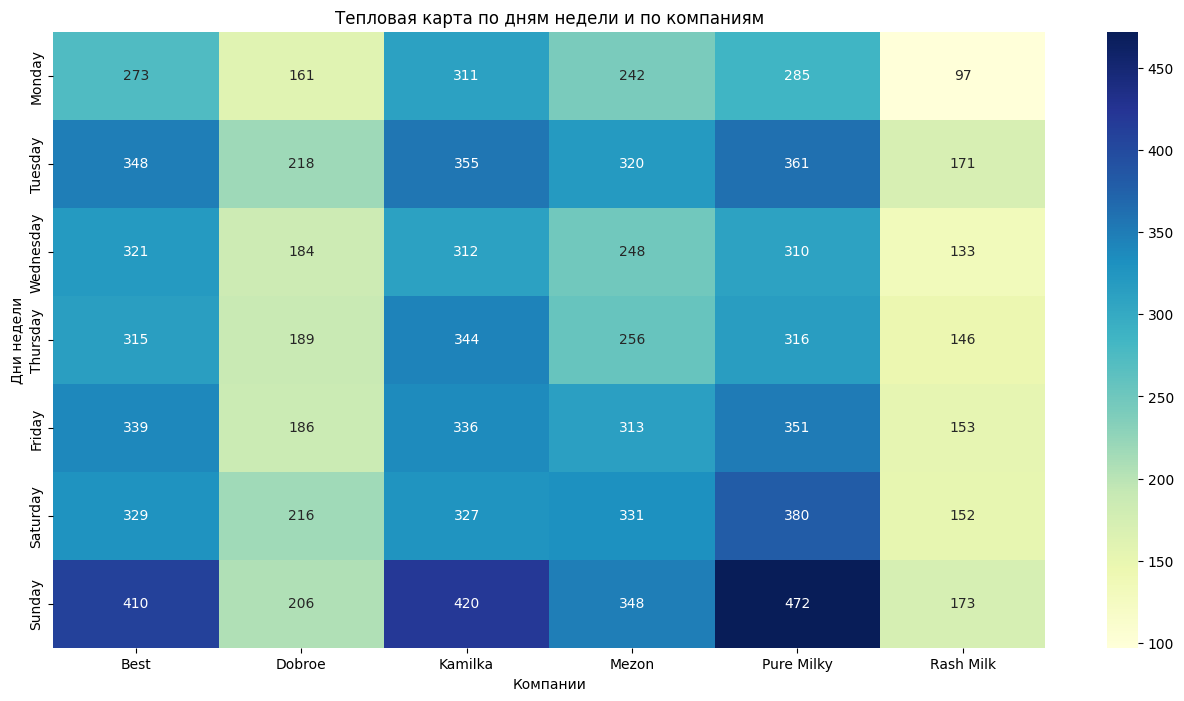

In [20]:
# 7

df['Day a week'] = pd.to_datetime(df['Дата']).dt.day_name()

heatmap_data = df.pivot_table(index='Day a week', columns='Компания', values='Количество', aggfunc='sum')
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(days_order)

plt.figure(figsize=(16, 8))
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Тепловая карта по дням недели и по компаниям')
plt.xlabel('Компании')
plt.ylabel('Дни недели')
plt.show()

In [19]:
# 8

df['Weekday'] = df['Дата'].dt.day_name()
weekday_sales = df.groupby('Weekday')['Количество'].sum()
weekday_sales.sort_values(ascending=False)

Weekday
Sunday       2029
Tuesday      1773
Saturday     1735
Friday       1678
Thursday     1566
Wednesday    1508
Monday       1369
Name: Количество, dtype: int64

In [21]:
df.to_csv('final_dataset.csv', index=False, encoding='utf-8-sig')